<a href="https://colab.research.google.com/github/sakeefmahmud/Exoplanet-Detection-Using-ML/blob/main/ExoPlanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score

import joblib
drive.mount('/content/drive')
file='/content/drive/My Drive/Colab Notebooks/Datasets/ExoPlanet.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
df=pd.read_csv(file)
df.shape

(19761, 17)

In [82]:
df

,PC1,PC2,PC3,label,ra,dec,j_mag,h_mag,k_mag,kep_mag,planet_radius,orbital_period,star_teff,star_logg,star_radius,star_mass,lc_time0
0,-0.329993,-0.469118,-0.051703,2,297.004820,48.134129,14.2540,13.900,13.826,15.4360,14.6000,19.899140,5853.0,4.544,0.86800,0.961,1.758503e+02
1,0.093289,-0.453369,0.408759,2,285.534610,48.285210,14.3260,13.911,13.809,15.5970,33.4600,1.736952,5805.0,4.564,0.79100,0.836,1.703076e+02
2,-0.469821,-0.455314,0.015327,0,288.754880,48.226200,14.3660,14.064,13.952,15.5090,2.7500,2.525592,6031.0,4.438,1.04600,1.095,1.715956e+02
3,-0.296522,0.062012,0.022569,0,296.286130,48.224670,14.5280,14.113,14.132,15.7140,3.9000,11.094321,6046.0,4.486,0.97200,1.053,1.712012e+02
4,-0.399275,-0.189558,0.008973,0,296.286130,48.224670,14.5280,14.113,14.132,15.7140,2.7700,4.134435,6046.0,4.486,0.97200,1.053,1.729794e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19756,-0.348945,-0.327069,-0.098004,1,313.272302,-7.474875,12.6615,12.274,12.188,12.3680,3.2800,2.770570,5711.0,4.410,1.02903,0.954,2.460529e+06
19757,-0.317936,-0.061170,-0.064701,1,291.820807,12.282756,12.6615,12.274,12.188,12.9812,12.9639,3.124376,5477.0,3.950,1.71000,0.954,2.460533e+06
19758,-0.327561,-0.097105,-0.063949,1,305.033226,-6.073279,12.6615,12.274,12.188,12.3942,13.1539,3.985955,5566.0,3.960,1.71000,0.954,2.460531e+06
19759,-0.373137,-0.205557,-0.045708,1,299.229685,23.001848,12.6615,12.274,12.188,12.0952,11.3707,4.903017,5663.0,4.010,1.64000,0.954,2.460529e+06


In [83]:
df.describe()

,PC1,PC2,PC3,label,ra,dec,j_mag,h_mag,k_mag,kep_mag,planet_radius,orbital_period,star_teff,star_logg,star_radius,star_mass,lc_time0
count,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,1.976100e+04
mean,-0.133381,-0.086460,-0.030991,0.987248,225.530937,18.569540,12.532646,12.139621,12.050162,12.936044,15.410385,29.993902,5649.264781,4.340121,1.471246,0.970271,1.456737e+06
std,1.024262,0.799844,0.503856,0.792513,95.189927,36.993569,1.232746,1.228578,1.236581,1.964285,198.858223,606.676580,1165.439181,0.345673,4.335476,0.261247,1.208171e+06
min,-0.591683,-2.864373,-7.777481,0.000000,0.084680,-89.471513,4.097000,3.014000,2.311000,4.627800,0.036257,0.152076,2520.000000,0.047000,0.109000,0.000000,1.205659e+02
25%,-0.442493,-0.411154,-0.044433,0.000000,136.755357,-6.268329,12.258000,11.868000,11.776000,11.715900,1.380000,2.537071,5217.000000,4.228000,0.820000,0.949000,1.399876e+02
50%,-0.383010,-0.209012,-0.009771,1.000000,285.099760,38.384121,12.661500,12.274000,12.188000,13.030900,3.280000,5.351287,5711.000000,4.410000,1.029030,0.954000,2.457147e+06
75%,-0.273000,-0.003262,0.001964,2.000000,294.618930,45.006290,13.027000,12.627000,12.539000,14.491000,12.463500,13.611650,6090.000000,4.521000,1.447080,0.959000,2.459357e+06
max,13.803377,24.012589,7.424680,3.000000,359.941195,89.086923,17.372000,17.615000,17.038000,20.003000,26042.900000,83830.000000,50000.000000,5.960650,229.908000,14.336000,2.460863e+06


In [84]:
df['label'].value_counts()


,count
label,
1,7413
0,6311
2,6015
3,22


In [85]:
df.dtypes

,0
PC1,float64
PC2,float64
PC3,float64
label,int64
ra,float64
dec,float64
j_mag,float64
h_mag,float64
k_mag,float64
kep_mag,float64


In [86]:
df.isnull().sum()

,0
PC1,0
PC2,0
PC3,0
label,0
ra,0
dec,0
j_mag,0
h_mag,0
k_mag,0
kep_mag,0


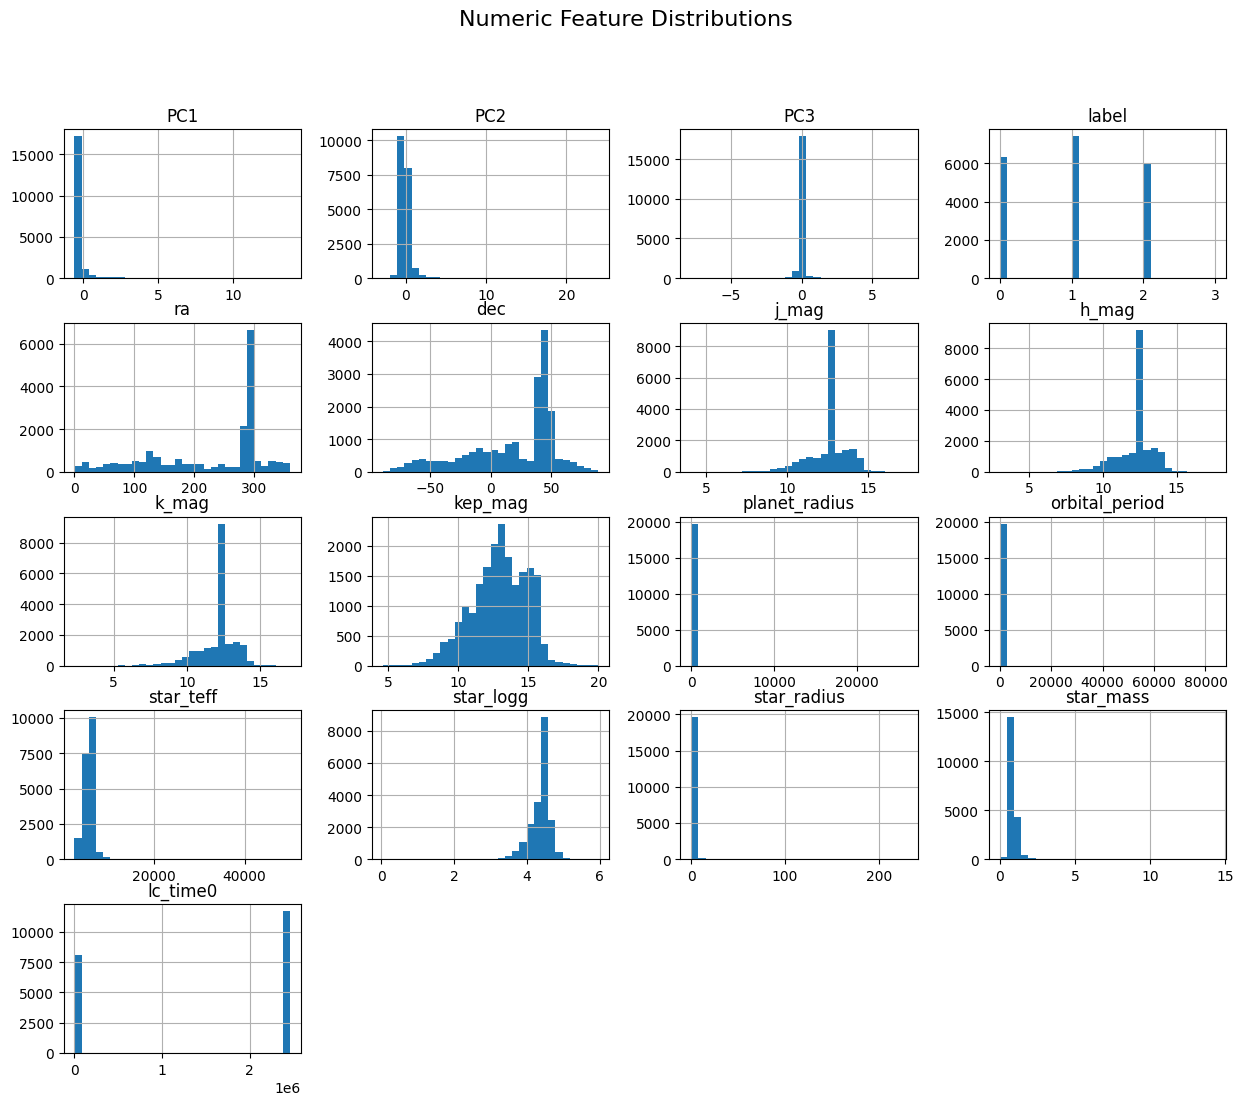

In [87]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

In [115]:
df[columns:='star_ratio']=df['star_mass']/df['star_radius']
df.head()

,PC1,PC2,PC3,label,ra,dec,j_mag,h_mag,k_mag,kep_mag,planet_radius,orbital_period,star_teff,star_logg,star_radius,star_mass,lc_time0,star_ratio
0,-0.329993,-0.469118,-0.051703,2,297.00482,48.134129,14.254,13.900,13.826,15.436,14.60,19.899140,5853.0,4.544,0.868,0.961,175.850252,1.107143
1,0.093289,-0.453369,0.408759,2,285.53461,48.285210,14.326,13.911,13.809,15.597,33.46,1.736952,5805.0,4.564,0.791,0.836,170.307565,1.056890
2,-0.469821,-0.455314,0.015327,0,288.75488,48.226200,14.366,14.064,13.952,15.509,2.75,2.525592,6031.0,4.438,1.046,1.095,171.595550,1.046845
3,-0.296522,0.062012,0.022569,0,296.28613,48.224670,14.528,14.113,14.132,15.714,3.90,11.094321,6046.0,4.486,0.972,1.053,171.201160,1.083333
4,-0.399275,-0.189558,0.008973,0,296.28613,48.224670,14.528,14.113,14.132,15.714,2.77,4.134435,6046.0,4.486,0.972,1.053,172.979370,1.083333


In [116]:
df.drop(columns=['star_mass','star_radius'], inplace=True)

In [64]:
# df['orbital_period']=np.log(df['orbital_period'])
# df['planet_radius']=np.log(df['planet_radius'])
# df['star_teff']=np.log(df['star_teff'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [117]:
x = df.drop(columns=['label'])
y = df['label']
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [120]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [119]:

model=RandomForestClassifier()
model.fit(x_train,y_train)


importances = pd.Series(model.feature_importances_, index=x_train.columns)
print(importances.sort_values(ascending=False))

lc_time0          0.130809
planet_radius     0.123820
dec               0.086552
PC3               0.079505
ra                0.074388
orbital_period    0.070078
kep_mag           0.069203
PC1               0.060737
PC2               0.060192
star_teff         0.052220
star_ratio        0.051719
star_logg         0.041443
h_mag             0.034821
j_mag             0.032845
k_mag             0.031669
dtype: float64


In [121]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

results = {}

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train_scaled_imputed = imputer.fit_transform(x_train_scaled)
x_test_scaled_imputed = imputer.transform(x_test_scaled)


for name, model in models.items():
    model.fit(x_train_scaled_imputed, y_train)
    y_p = model.predict(x_test_scaled_imputed)
    acc = accuracy_score(y_test, y_p) * 100
    results[name] = acc
    print(f"{name}: {acc:.2f}%")

Logistic Regression: 62.77%
Decision Tree: 76.78%
Random Forest: 84.18%
Gradient Boosting: 79.14%
AdaBoost: 61.39%
SVM: 72.33%
Naive Bayes: 56.75%
KNN: 73.11%


In [122]:

from sklearn.model_selection import cross_val_score


model = RandomForestClassifier(random_state=42)

scores = cross_val_score(model, x_res, y_res, cv=5)
print(f"Random Forest (with SMOTE) Cross-Validation Accuracy: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")

Random Forest (with SMOTE) Cross-Validation Accuracy: 73.90% ± 6.69%


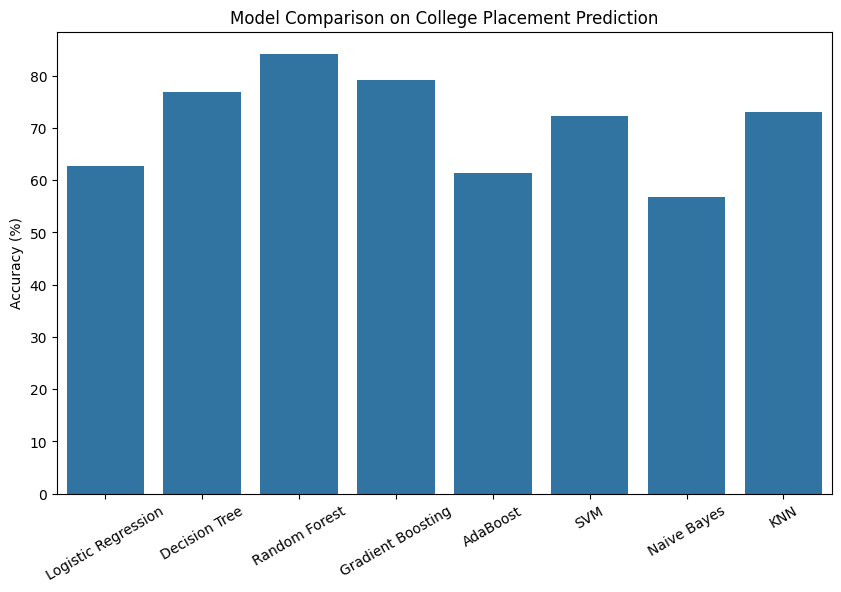

In [123]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=30)
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison on College Placement Prediction")
plt.show()

In [124]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report

print("Model Evaluation Metrics:")
for name, model in models.items():

    y_pred = model.predict(x_test_scaled_imputed)


    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    try:

        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(x_test_scaled_imputed)
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        else:
            roc_auc = "N/A"

    except AttributeError:
        roc_auc = "N/A"

    print(f"\n{name}:")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")
    print(f"  ROC AUC: {roc_auc}")

Model Evaluation Metrics:

Logistic Regression:
  Recall: 0.63
  F1-score: 0.62
  ROC AUC: 0.847640759687831

Decision Tree:
  Recall: 0.77
  F1-score: 0.77
  ROC AUC: 0.8447747084319481

Random Forest:
  Recall: 0.84
  F1-score: 0.84
  ROC AUC: 0.9624789031662676

Gradient Boosting:
  Recall: 0.79
  F1-score: 0.79
  ROC AUC: 0.9429807954613258

AdaBoost:
  Recall: 0.61
  F1-score: 0.60
  ROC AUC: 0.8234367629528067

SVM:
  Recall: 0.72
  F1-score: 0.72
  ROC AUC: N/A

Naive Bayes:
  Recall: 0.57
  F1-score: 0.55
  ROC AUC: 0.8223648129406055

KNN:
  Recall: 0.73
  F1-score: 0.73
  ROC AUC: 0.8938670587181515


In [125]:

model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [126]:
joblib.dump(model, 'ExoPlanet.pkl')

['ExoPlanet.pkl']

In [127]:
model=joblib.load('ExoPlanet.pkl')
predictions=model.predict(x_test)
score=accuracy_score(predictions,y_test)
print(f' Accuracy score.:{score}')

 Accuracy score.:0.8433653684033047


In [130]:

new_input_data = {
    'PC1': [0.1],
    'PC2': [-0.2],
    'PC3': [0.05],
    'ra': [150.0],
    'dec': [30.0],
    'j_mag': [13.0],
    'h_mag': [12.5],
    'k_mag': [12.0],
    'kep_mag': [14.0],
    'planet_radius': [5.0],
    'orbital_period': [10.0],
    'star_teff': [5500.0],
    'star_logg': [4.5],
    'lc_time0': [2460000.0],
    'star_ratio': [1.0]
}

new_input_df = pd.DataFrame(new_input_data)


new_input_df = new_input_df[x.columns]
new_input_scaled_imputed = imputer.transform(scaler.transform(new_input_df))


new_prediction = model.predict(new_input_scaled_imputed)
print(new_prediction)

if new_prediction[0] == 0:
    print('Exoplanet Confirmed')
elif new_prediction[0] == 1:
    print('Exoplanet Candidate')
elif new_prediction[0] == 2:
    print('False Positive Exoplanet')
else:
    print('Refuted')

[1]
Exoplanet Candidate
